In [1]:
import numpy as np
import pandas as pd

# tree와 regression 관련 라이브러리
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# k-fold cross validation(교차검증) 관련 라이브러리

from sklearn.model_selection import KFold

# 임의로 데이터 섞기 위한 라이브러리 >> random shuffling
from sklearn.utils import shuffle

# iris data 불러오기

from sklearn.datasets import load_iris

In [3]:
# decision tree(의사결정나무) 간단히 맛보기 예제

X = [[0,0], [2,2]]
y = [0.5, 2.5]

In [5]:
# 의사결정나무 생성
clf = tree.DecisionTreeRegressor()

# 훈련
clf = clf.fit(X, y)

# test data 사용 예측하기
clf.predict([[1,1]])

array([0.5])

In [6]:
# Decision Tree 분류 예제(iris data)

# 데이터 불러오기
iris = load_iris()

In [7]:
# 데이터 feature, response 분리
X_iris, y_iris = iris.data, iris.target

In [8]:
X_iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# 의사결정나무 객체 생성

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth = 2)

# 훈련
clf.fit(X_iris, y_iris)

# test data 사용, 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])

array([1])

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

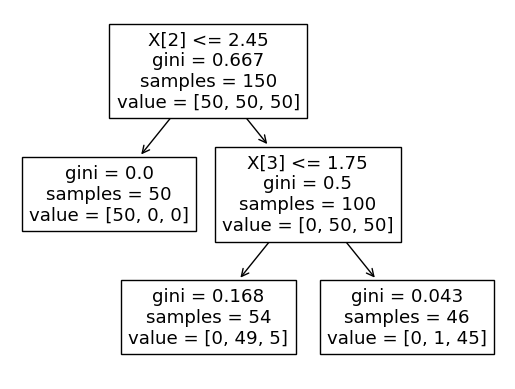

In [11]:
# tree 시각화

tree.plot_tree(clf)

In [12]:
# tree 시각화

r = export_text(clf, feature_names = iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [15]:
# 의사결정나무 객체 생성

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth = 3)

# 훈련
clf.fit(X_iris, y_iris)

# test data 사용, 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])

array([1])

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

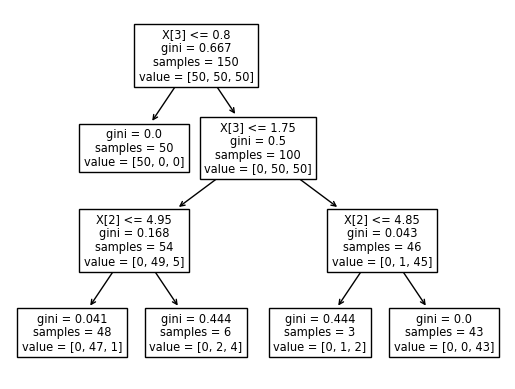

In [16]:
# tree 시각화

tree.plot_tree(clf)

In [17]:
# tree 시각화

r = export_text(clf, feature_names = iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [18]:
# 분기에 사용된 feature도 재사용됨을 알 수 있음



In [19]:
# 의사결정나무 객체 생성

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth = 1)

# 훈련
clf.fit(X_iris, y_iris)

# test data 사용, 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])

array([1])

[Text(0.5, 0.75, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]')]

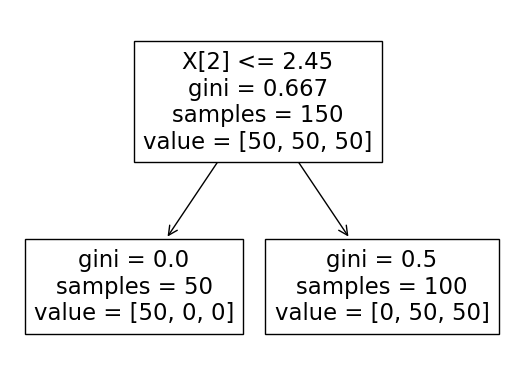

In [20]:
# tree 시각화

tree.plot_tree(clf)

In [21]:
# tree 시각화

r = export_text(clf, feature_names = iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- class: 1



In [22]:
# pruning 기법 활용 depth조정

clf = tree.DecisionTreeClassifier(ccp_alpha = 1)
# ccp_alpha : 작을수록 규제가 작음

# 훈련
clf = clf.fit(X_iris, y_iris)

# test data 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])

# array([0]) : 첫번째(setosa)로 예측함

array([0])

[Text(0.5, 0.5, 'gini = 0.667\nsamples = 150\nvalue = [50, 50, 50]')]

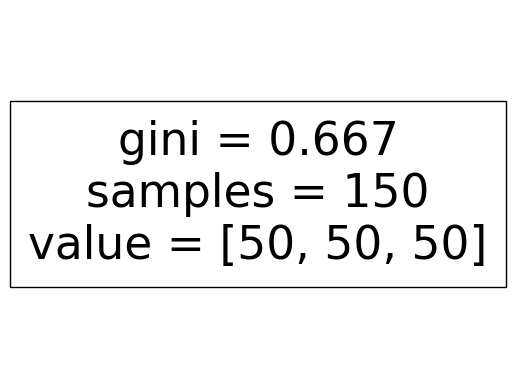

In [24]:
# tree 시각화

tree.plot_tree(clf)

In [25]:
# pruning 기법 활용 depth조정

clf = tree.DecisionTreeClassifier(ccp_alpha = 0.01)
# ccp_alpha : 작을수록 규제가 작음

# 훈련
clf = clf.fit(X_iris, y_iris)

# test data 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])


array([1])

[Text(0.5, 0.9, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.5, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.3333333333333333, 0.3, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

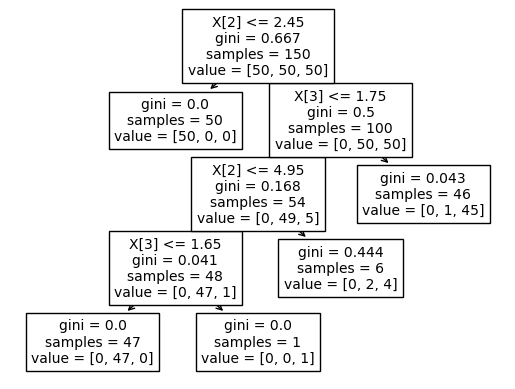

In [26]:
# tree 시각화

tree.plot_tree(clf)

In [27]:
# Boosting 예제

# 데이터 임의로 섞기 (random shuffling)

X_iris, y_iris = shuffle(X_iris, y_iris, random_state = 0)

In [28]:
X_iris[:10]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3]])

In [29]:
y_iris

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [31]:
# train data, test data 구분

X_train, X_test = X_iris[:120], X_iris[120:]

y_train, y_test = y_iris[:120], y_iris[120:]


In [32]:
for n_trees in [1, 10, 50, 100] :
    # boosting 객체 생성 및 훈련
    clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0, 
                                     max_depth=1, random_state = 0).fit(X_train, y_train)
    
    print(clf.score(X_test, y_test))

0.9
0.9333333333333333
0.9333333333333333
0.9333333333333333


In [33]:
for n_trees in [1, 10, 50, 100] :
    # boosting 객체 생성 및 훈련
    clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0, 
                                     max_depth=2, random_state = 0).fit(X_train, y_train)
    
    print(clf.score(X_test, y_test))

0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333


In [38]:
for n_trees in [1, 10, 50, 100] :
    # boosting 객체 생성 및 훈련
    clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0, 
                                     max_depth=2, random_state = 0).fit(X_train, y_train)
    
    print(clf.score(X_test, y_test))

0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333


In [40]:
# hitters 데이터 실습

hitters = pd.read_csv('Hitters.csv', index_col = 0)
hitters

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


In [41]:
# 데이터 임의로 섞기

hitters = shuffle(hitters, random_state = 0)

hitters

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
559,141,2,48,61,73,8,3162,874,16,421,349,359,N,E,352,414,9,925.0,N
585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.0,A
183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
512,117,29,54,88,43,6,1750,412,100,204,276,155,A,W,1236,98,18,100.0,A
600,144,33,85,117,65,2,696,173,38,101,130,69,A,W,319,4,14,165.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,82,21,42,60,35,5,1770,408,115,238,299,157,A,W,0,0,0,425.0,A
491,141,11,77,47,37,15,4291,1240,84,615,430,340,A,E,239,8,2,525.0,A
283,77,14,45,47,26,16,6840,1910,259,915,1067,546,A,W,144,6,5,700.0,A


In [42]:
# NaN 포함된 행 제거

hitters = hitters.dropna()
hitters

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
559,141,2,48,61,73,8,3162,874,16,421,349,359,N,E,352,414,9,925.0,N
585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.0,A
512,117,29,54,88,43,6,1750,412,100,204,276,155,A,W,1236,98,18,100.0,A
600,144,33,85,117,65,2,696,173,38,101,130,69,A,W,319,4,14,165.0,A
341,95,6,48,42,20,10,2964,808,81,379,428,221,N,W,158,4,5,100.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,82,21,42,60,35,5,1770,408,115,238,299,157,A,W,0,0,0,425.0,A
491,141,11,77,47,37,15,4291,1240,84,615,430,340,A,E,239,8,2,525.0,A
283,77,14,45,47,26,16,6840,1910,259,915,1067,546,A,W,144,6,5,700.0,A


In [47]:
# hitter data 활용, random forest 모델 적용

# k-fold CV의 fold 수 지정

n_fold = 5

for t_param in ('sqrt', 5) :
    print('Number of features :', t_param)
    kf = KFold(n_splits = n_fold)
    idx = 1
    
    sum_val_mse = 0
    for train, test in kf.split(hitters) :
        print('Fold: #', idx)
        
        # train set의 feature와 response 분리
        train_X = hitters.iloc[train][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        train_y = hitters.iloc[train]['Salary']
        
        # test set의 feature와 response 분리
        test_X = hitters.iloc[test][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        test_y = hitters.iloc[test]['Salary']
        
        # random forest 객체 생성
        rf =RandomForestRegressor(max_depth = 3, max_features = t_param, random_state = 0)
        
        # 훈련용 데이터셋 이용 적합
        rf.fit(train_X, train_y)
        
        # test data로 예측
        y_pred = rf.predict(test_X)
        
        # test MSE
        val_mse = mean_squared_error(test_y, y_pred)
        print('MSE : %.2f'%(val_mse))
        
        # test MSE 합계
        sum_val_mse += val_mse
        
        print('-'*100)
        idx+= 1
    print('Average Validation MSE : %.2f'%(sum_val_mse/n_fold))
    print('*'*100)

Number of features : sqrt
Fold: # 1
MSE : 79710.02
----------------------------------------------------------------------------------------------------
Fold: # 2
MSE : 95799.47
----------------------------------------------------------------------------------------------------
Fold: # 3
MSE : 138658.70
----------------------------------------------------------------------------------------------------
Fold: # 4
MSE : 91889.05
----------------------------------------------------------------------------------------------------
Fold: # 5
MSE : 155939.57
----------------------------------------------------------------------------------------------------
Average Validation MSE : 112399.36
****************************************************************************************************
Number of features : 5
Fold: # 1
MSE : 61562.94
----------------------------------------------------------------------------------------------------
Fold: # 2
MSE : 87234.29
--------------------------------